# Lorenz attractor simulation

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def lorenz(t, u, σ, ρ, β):
    x, y, z = u
    dudt = [
        σ*(y - x),
        x*(ρ - z) - y,
        x*y - β*z   
    ]
    return dudt

## Solve up initial value problem

In [3]:
σ = 10
β = 8/3
ρ = 28

dt = 0.01
u0 = np.random.rand(3)
t_eval = np.arange(0, 80+dt, dt)
t = 0, t_eval[-1]

sol = solve_ivp(lorenz, t, u0, args=(σ, ρ, β), t_eval=t_eval)

## Visualize trajectory

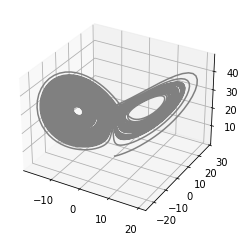

In [4]:
x, y, z = sol.y
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'gray')
pass

### Generate training data


In [5]:
sol.y.shape

(3, 8001)

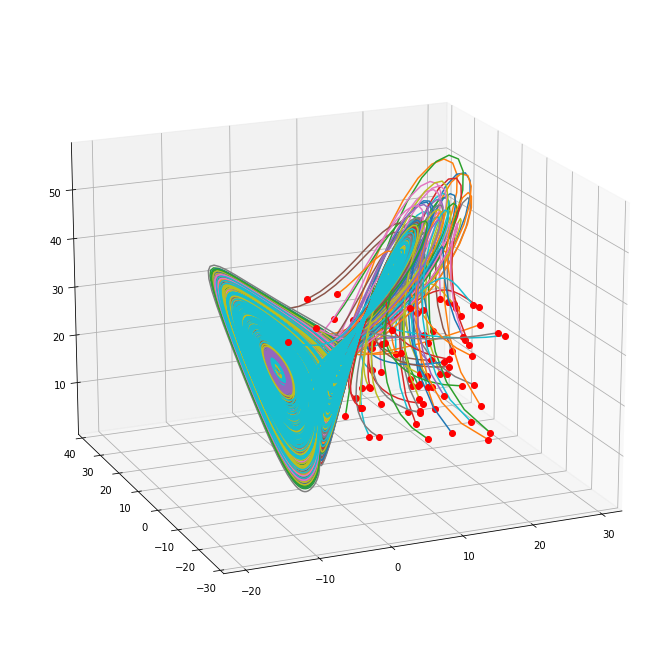

In [6]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'}, figsize=(12,12))

inputs = []
outputs = []
for j in range(100):
    u0 = 30*np.random.rand(3) - 0.5
    t_eval = np.arange(0, 80+dt, dt)
    t = 0, t_eval[-1]

    sol = solve_ivp(lorenz, t, u0, args=(σ, ρ, β), t_eval=t_eval)
    inputs.append(sol.y[:, :-1].T)
    outputs.append(sol.y[:, 1:].T)
    ax.plot3D(*sol.y)
    ax.plot3D(*sol.y[:,0], 'ro')
    ax.view_init(18, -113)

In [7]:
np.save('inputs.npy', np.array(inputs))
np.save('outputs.npy', np.array(outputs))